In [1]:
import numpy as np
import sympy as sp
from math import sin
from IPython.display import Latex, display

In [2]:
print('--------metrica----------')
D = 3
# r, theta variables simbolicas
metrica = sp.Matrix([['-exp(2*a(r))' , '0' , '0', '0'],['0', 'exp(2*b(r))', '0', '0'],['0', '0', 'r**2', '0'],
                    ['0', '0', '0', 'r**2*(sin(theta))**2']])
print(metrica)
print('-------------------------')

--------metrica----------
Matrix([[-exp(2*a(r)), 0, 0, 0], [0, exp(2*b(r)), 0, 0], [0, 0, r**2, 0], [0, 0, 0, r**2*sin(theta)**2]])
-------------------------


In [3]:
metricainv = metrica.inv()
gamma = np.zeros((D+1,D+1,D+1),list) # simbolos de christoffel
x = ['t','r','theta','phi']

In [4]:
sum = 0
for i in range(D+1): #lambda
    for j in range(D+1): # mu
        for k in range(D+1): # nu
            for l in range(D+1): # sigma
                sum += 0.5*metricainv[i,l]*(sp.diff(metrica[k,l],x[j]) 
                                            + sp.diff(metrica[j,l],x[k]) - sp.diff(metrica[j,k],x[l]))
            gamma[i][j][k] = sum
            sum = 0

In [5]:
print(gamma)

[[[0 1.0*Derivative(a(r), r) 0 0]
  [1.0*Derivative(a(r), r) 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r) 0 0 0]
  [0 1.0*Derivative(b(r), r) 0 0]
  [0 0 -1.0*r*exp(-2*b(r)) 0]
  [0 0 0 -1.0*r*exp(-2*b(r))*sin(theta)**2]]

 [[0 0 0 0]
  [0 0 1.0/r 0]
  [0 1.0/r 0 0]
  [0 0 0 -1.0*sin(theta)*cos(theta)]]

 [[0 0 0 0]
  [0 0 0 1.0/r]
  [0 0 0 1.0*cos(theta)/sin(theta)]
  [0 1.0/r 1.0*cos(theta)/sin(theta) 0]]]


In [6]:
for i in range(D+1):
    for j in range(D+1):
        for k in range(D+1): 
            if gamma[i,j,k] != 0: 
                print("gamma(",x[i], x[j], x[k],") = ",gamma[i,j,k])

gamma( t t r ) =  1.0*Derivative(a(r), r)
gamma( t r t ) =  1.0*Derivative(a(r), r)
gamma( r t t ) =  1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r)
gamma( r r r ) =  1.0*Derivative(b(r), r)
gamma( r theta theta ) =  -1.0*r*exp(-2*b(r))
gamma( r phi phi ) =  -1.0*r*exp(-2*b(r))*sin(theta)**2
gamma( theta r theta ) =  1.0/r
gamma( theta theta r ) =  1.0/r
gamma( theta phi phi ) =  -1.0*sin(theta)*cos(theta)
gamma( phi r phi ) =  1.0/r
gamma( phi theta phi ) =  1.0*cos(theta)/sin(theta)
gamma( phi phi r ) =  1.0/r
gamma( phi phi theta ) =  1.0*cos(theta)/sin(theta)


In [7]:
riemann = np.zeros((D+1,D+1,D+1,D+1),list) # tensor de riemann

In [8]:
sum = 0
for rho in range(D+1): #rho
    for sigmma in range(D+1): # sigmma
        for mu in range(D+1): # mu
            for nu in range(D+1): # nu
                for l in range(D+1): # lambda
                    sum += gamma[rho,mu,l]*gamma[l,nu,sigmma] - gamma[rho,nu,l]*gamma[l,mu,sigmma]
                riemann[rho,sigmma,mu,nu]=sum+sp.diff(gamma[rho,nu,sigmma],x[mu])-sp.diff(gamma[rho,mu,sigmma],x[nu])
                sum = 0
                
print(riemann)

[[[[0 0 0 0]
   [0 0 0 0]
   [0 0 0 0]
   [0 0 0 0]]

  [[0
    -1.0*Derivative(a(r), r)**2 + 1.0*Derivative(a(r), r)*Derivative(b(r), r) - 1.0*Derivative(a(r), (r, 2))
    0 0]
   [1.0*Derivative(a(r), r)**2 - 1.0*Derivative(a(r), r)*Derivative(b(r), r) + 1.0*Derivative(a(r), (r, 2))
    0 0 0]
   [0 0 0 0]
   [0 0 0 0]]

  [[0 0 -1.0*r*exp(-2*b(r))*Derivative(a(r), r) 0]
   [0 0 0 0]
   [1.0*r*exp(-2*b(r))*Derivative(a(r), r) 0 0 0]
   [0 0 0 0]]

  [[0 0 0 -1.0*r*exp(-2*b(r))*sin(theta)**2*Derivative(a(r), r)]
   [0 0 0 0]
   [0 0 0 0]
   [1.0*r*exp(-2*b(r))*sin(theta)**2*Derivative(a(r), r) 0 0 0]]]


 [[[0
    -1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r)**2 + 1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r)*Derivative(b(r), r) - 1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), (r, 2))
    0 0]
   [1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r)**2 - 1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r)*Derivative(b(r), r) + 1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), (r, 2))
    0

In [9]:
for i in range(D+1):
    for j in range(D+1):
        for k in range(D+1):
            for l in range(D+1):
                if riemann[i,j,k,l] != 0: 
                    print("riemann(",x[i], x[j], x[k], x[l],") = ",riemann[i,j,k,l])

riemann( t r t r ) =  -1.0*Derivative(a(r), r)**2 + 1.0*Derivative(a(r), r)*Derivative(b(r), r) - 1.0*Derivative(a(r), (r, 2))
riemann( t r r t ) =  1.0*Derivative(a(r), r)**2 - 1.0*Derivative(a(r), r)*Derivative(b(r), r) + 1.0*Derivative(a(r), (r, 2))
riemann( t theta t theta ) =  -1.0*r*exp(-2*b(r))*Derivative(a(r), r)
riemann( t theta theta t ) =  1.0*r*exp(-2*b(r))*Derivative(a(r), r)
riemann( t phi t phi ) =  -1.0*r*exp(-2*b(r))*sin(theta)**2*Derivative(a(r), r)
riemann( t phi phi t ) =  1.0*r*exp(-2*b(r))*sin(theta)**2*Derivative(a(r), r)
riemann( r t t r ) =  -1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r)**2 + 1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r)*Derivative(b(r), r) - 1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), (r, 2))
riemann( r t r t ) =  1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r)**2 - 1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), r)*Derivative(b(r), r) + 1.0*exp(2*a(r))*exp(-2*b(r))*Derivative(a(r), (r, 2))
riemann( r theta r theta ) =  1.0*r*exp(-2*b(r

In [10]:
print('--------metrica schwarzschild----------')
D = 3
# r, theta variables simbolicas
metrica = sp.Matrix([['1-2*G*M/r' , '0' , '0', '0'],['0', '(1-2*G*M/r)**(-1)', '0', '0'],['0', '0', 'r**2', '0'],
                    ['0', '0', '0', 'r**2*(sin(theta))**2']])
print(metrica)
print('-------------------------')

metricainv = metrica.inv()
gamma = np.zeros((D+1,D+1,D+1),list) # simbolos de christoffel
x = ['t','r','theta','phi']

sum = 0
for i in range(D+1): #lambda
    for j in range(D+1): # mu
        for k in range(D+1): # nu
            for l in range(D+1): # sigma
                sum += 0.5*metricainv[i,l]*(sp.diff(metrica[k,l],x[j]) 
                                            + sp.diff(metrica[j,l],x[k]) - sp.diff(metrica[j,k],x[l]))
            gamma[i][j][k] = sum
            sum = 0
for i in range(D+1):
    for j in range(D+1):
        for k in range(D+1): 
            if gamma[i,j,k] != 0: 
                print("gamma(",x[i], x[j], x[k],") = ",gamma[i,j,k])


--------metrica schwarzschild----------
Matrix([[-2*G*M/r + 1, 0, 0, 0], [0, 1/(-2*G*M/r + 1), 0, 0], [0, 0, r**2, 0], [0, 0, 0, r**2*sin(theta)**2]])
-------------------------
gamma( t t r ) =  1.0*G*M/(r**2*(-2*G*M/r + 1))
gamma( t r t ) =  1.0*G*M/(r**2*(-2*G*M/r + 1))
gamma( r t t ) =  -2*G*M*(-1.0*G*M/r + 0.5)/r**2
gamma( r r r ) =  -2*G*M*(-1.0*G*M/r + 0.5)/(r**2*(-2*G*M/r + 1)**2)
gamma( r theta theta ) =  -2*r*(-1.0*G*M/r + 0.5)
gamma( r phi phi ) =  -2*r*(-1.0*G*M/r + 0.5)*sin(theta)**2
gamma( theta r theta ) =  1.0/r
gamma( theta theta r ) =  1.0/r
gamma( theta phi phi ) =  -1.0*sin(theta)*cos(theta)
gamma( phi r phi ) =  1.0/r
gamma( phi theta phi ) =  1.0*cos(theta)/sin(theta)
gamma( phi phi r ) =  1.0/r
gamma( phi phi theta ) =  1.0*cos(theta)/sin(theta)


In [37]:
display(Latex('\\begin{equation}' + sp.latex('\\Gamma') + '\\end{equation}'))  

<IPython.core.display.Latex object>

In [45]:
string = str(gamma[0,0,1])
string = '{'
for  i in range(len(string)):
    string += string[i]
string += '}'
print(string)

{{}


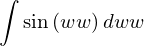

In [65]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)

func = sp.Function('func')
ww = sp.Symbol('ww')
func = sp.sin(ww)
inte = sp.Integral(func,ww)
display(inte)

In [80]:
display(Latex('\\begin{equation}' + sp.latex('\sqrt{}') + '\\end{equation}'))  

<IPython.core.display.Latex object>